In [39]:
import os
from datetime import datetime
from pprint import pprint
from typing import List

import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import Union
import app
import matplotlib.patches as patches

In [2]:
data_folder = r"D:\[Code]\HydrofractureShackleton_2023\data"

tides = app.load_tide_files(
    [
        os.path.join(data_folder, f)
        for f in os.listdir(data_folder)
        if "tides" in f.lower()
    ]
)

filepath = os.path.join(data_folder, "shackleton_hydrofractures_JS.xlsx")
drains = app.load_drain_file(filepath)
drains["summer"] = [app.determine_antarctic_summer(d) for d in drains["date-0 vis"]]

d:\[Code]\HydrofractureShackleton_2023\app\dates.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column])
d:\[Code]\HydrofractureShackleton_2023\app\dates.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[value_column] = df[value_column].interpolate(
d:\[Code]\HydrofractureShackleton_2023\app\dates.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

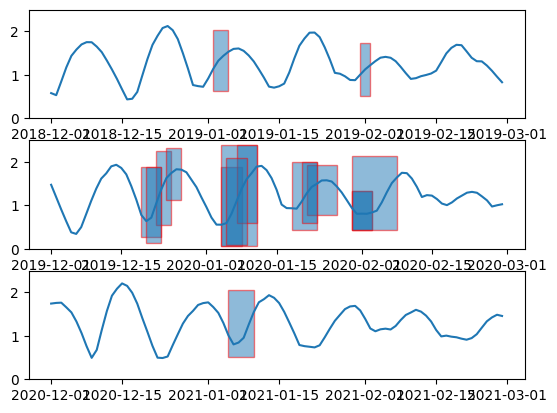

In [53]:
ymin = 0
ymax = 2.5

fig, axes = plt.subplots(3, 1)

for i_summer, summer in enumerate(tides.summer.unique()):

    drains_summer = drains.query("summer == @summer")
    tides_summer = tides.query("summer == @summer")

    ax = axes.ravel()[i_summer]
    ax.plot(tides_summer.date, tides_summer.tide)
    ax.set_ylim(ymin, ymax)
    for i_drain, (date0, date1, sat0, sat1) in enumerate(zip(drains_summer['date-0 vis'], drains_summer['date-1 vis'], drains_summer['sat-0 vis'], drains_summer['sat-1 vis'])):
        values = app.interpolate_dates(
                tides_summer,
                "date",
                "tide",
                [date0.strftime("%Y-%m-%d"), date1.strftime("%Y-%m-%d")],
            )
        #ax.scatter(date0, np.mean(values), color="red", zorder=100)
        ax.axvspan(
            xmin=date0,
            xmax=date1,
            ymin=(values[0] - 0.5 - ymin) / (ymax - ymin),
            ymax=(values[1] + 0.5 - ymin) / (ymax - ymin),
            color=None,
            edgecolor="red",
            alpha = 0.5
        )